In [ ]:
!pip install yfinance

In [ ]:
! pip install keras

In [ ]:
!pip install pandas_ta

In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os


In [3]:
path = 'household_power_consumption.csv'
df = pd.read_csv(path)

In [5]:
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [7]:
df.head(10)
print("____________________________________________")
print("Dataset shape: ", df.shape)
print("____________________________________________")
df.info()

____________________________________________
Dataset shape:  (260640, 10)
____________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB


In [9]:
df.duplicated().sum()
df.drop(['index'], axis= 1, inplace= True)


In [11]:
# verifica daca sunt valori nule
df.isna().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           3771
dtype: int64

In [13]:
# elimina valorile nule
df.dropna(inplace = True)
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [15]:
#data

In [17]:
data = df

data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
# Convert the all necessary columns to numeric format
# and remove any rows with NaN values
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])

# Convert the 'date_time' column to datetime format
data['date_time'] = pd.to_datetime(data['date_time']) 

# Create new columns for year, quarter, month, and day
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)

# Drop unnecessary qurters
data = data[data["quarter"] != 3]
data = data[data["quarter"] != 4]

# Create new feature that indicates which part of day
data["Daytime"] = data["date_time"].dt.hour
data["Daytime"] = data["Daytime"].apply(lambda x : int(x/8))


C:\Users\Admin\AppData\Local\Temp\ipykernel_4540\3102741685.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


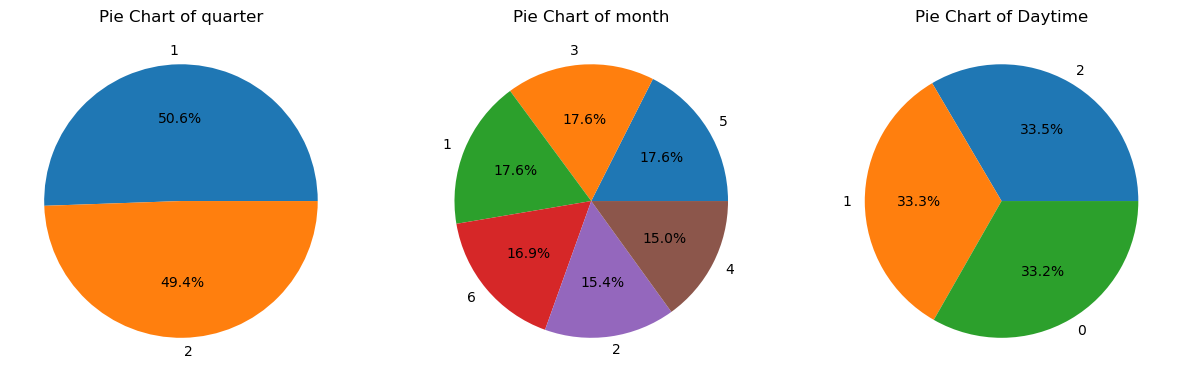

In [18]:
columns = ["quarter", "month", "Daytime"]

fig, axes = plt.subplots(1, len(columns), figsize = (15,5))

for plot_index, columns in enumerate(columns):
    value_counts = data[columns].value_counts()
    values = value_counts.values
    labels = value_counts.index
    
    axes[plot_index].pie(values, labels= labels, autopct="%1.1f%%")
    axes[plot_index].set_title(f"Pie Chart of {columns}")

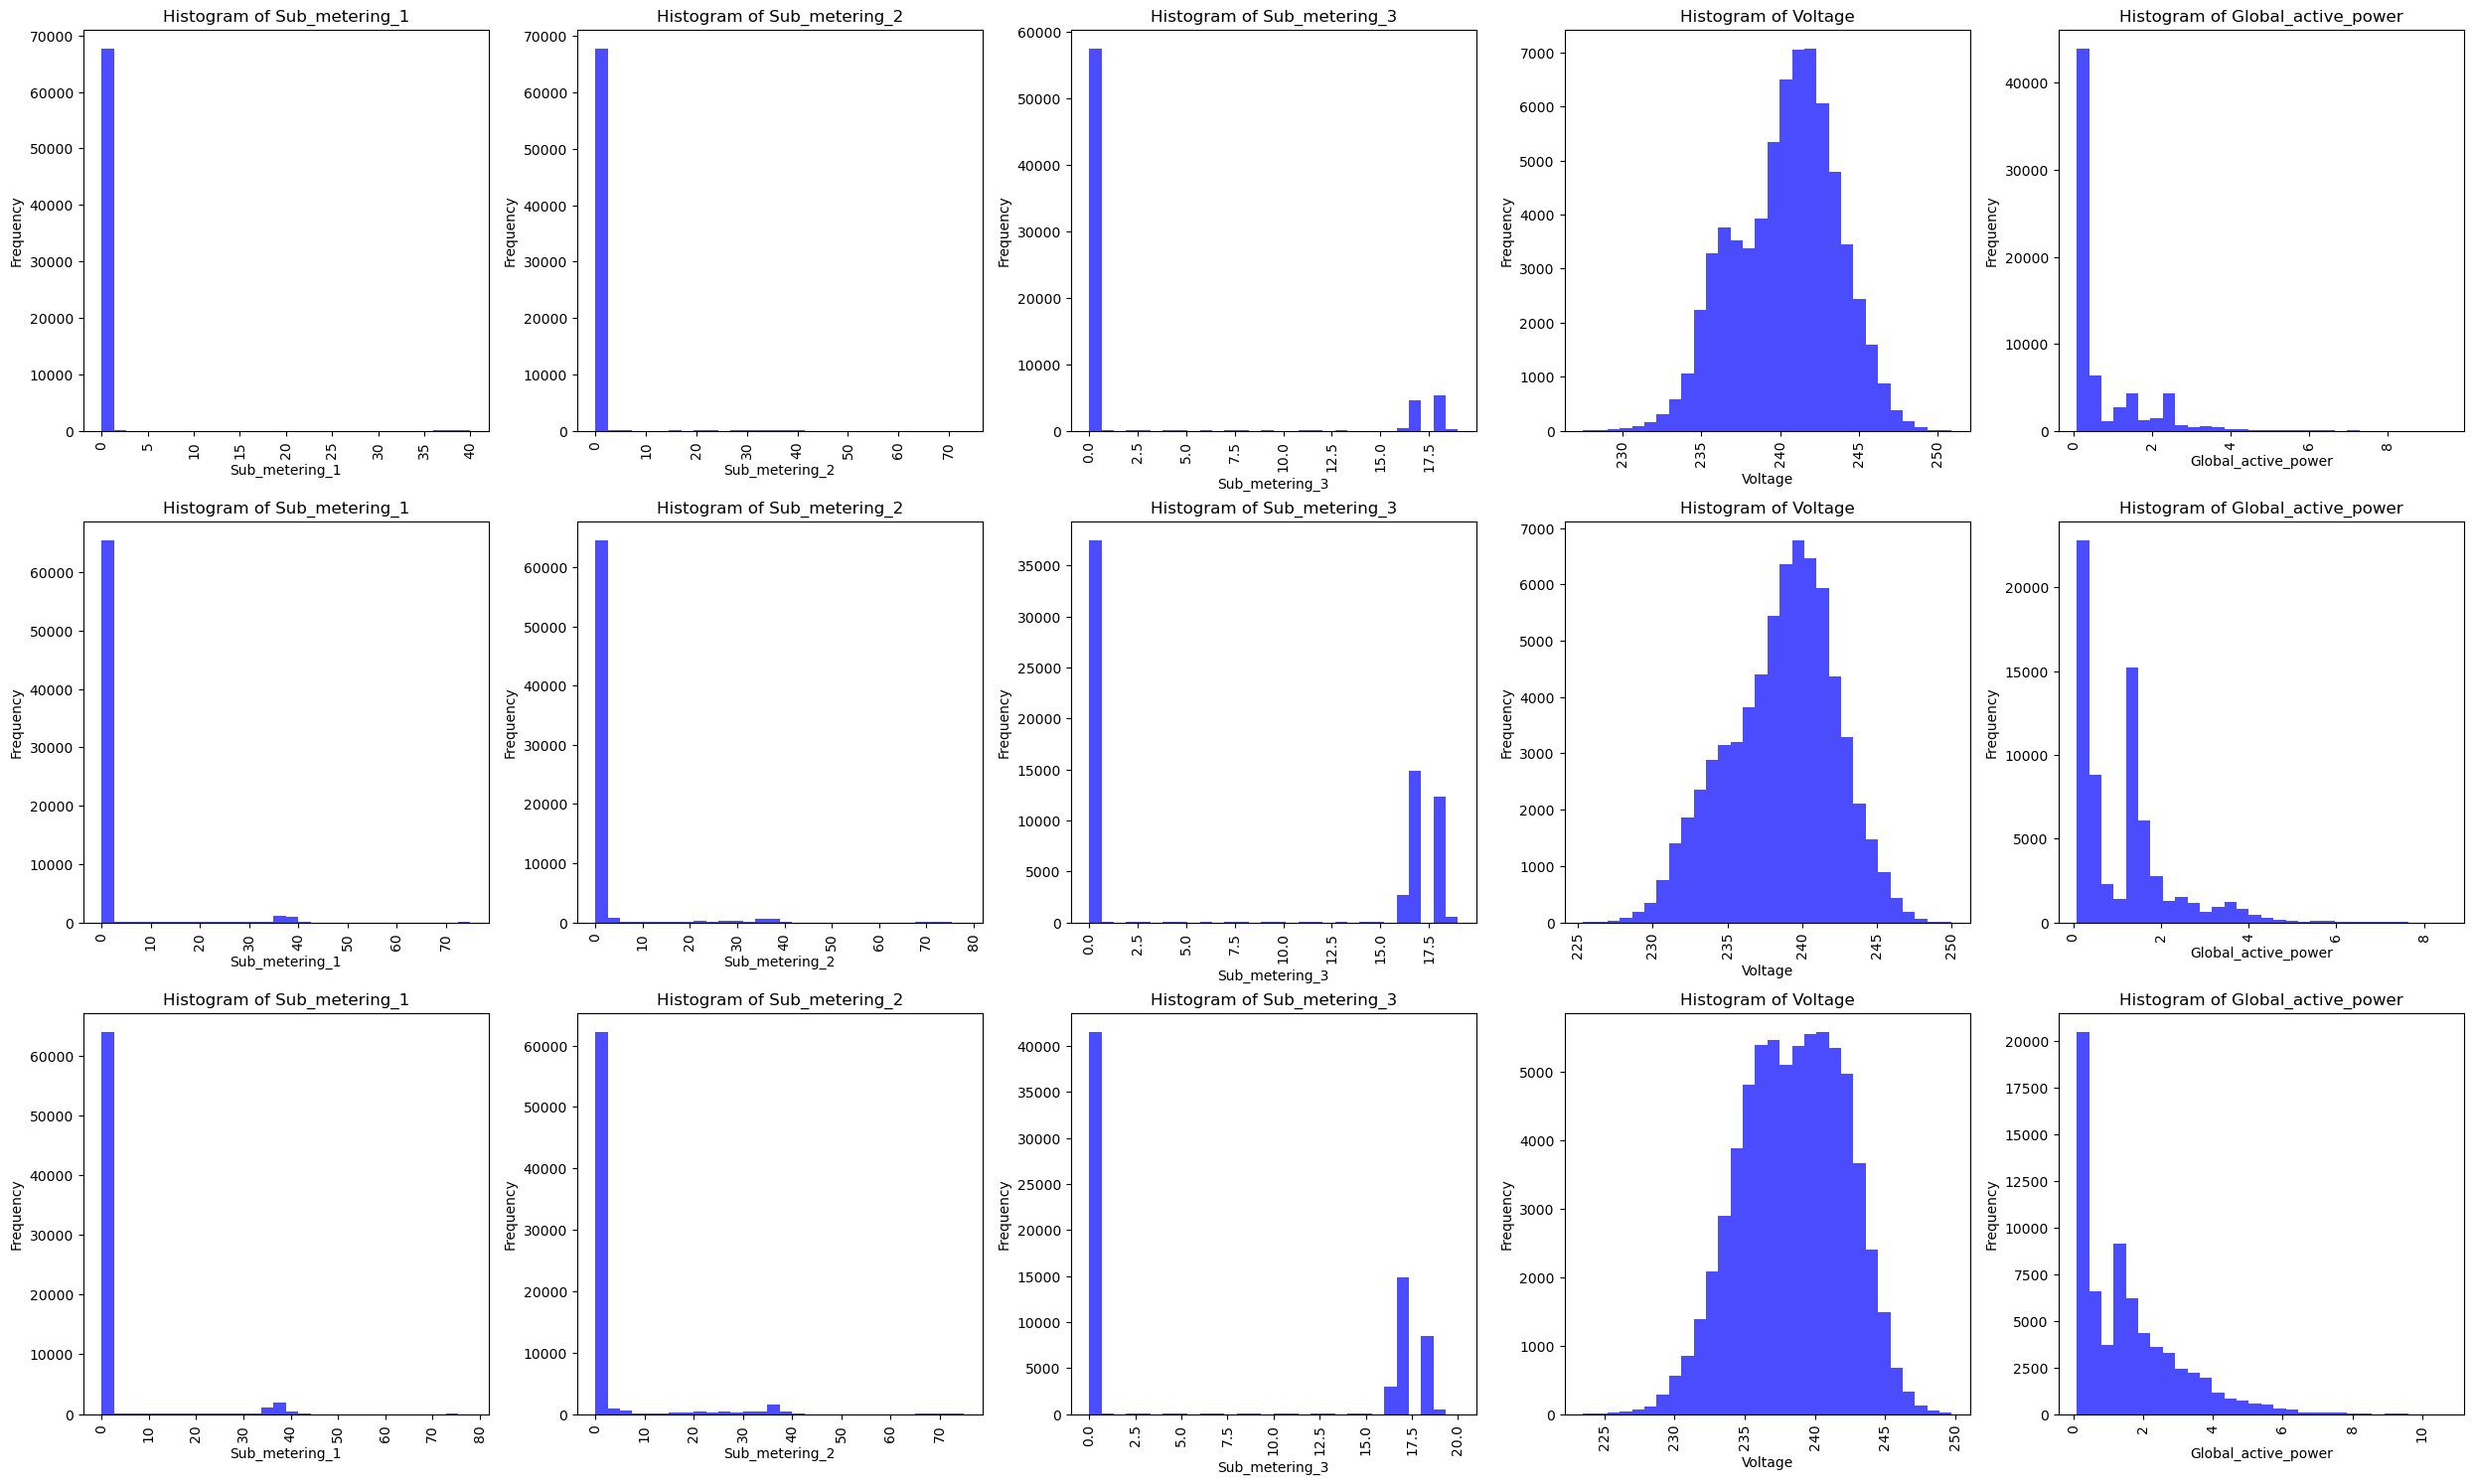

In [19]:
time_data = data
features = [0, 1, 2]
columns = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Voltage", "Global_active_power"]

def create_good_histograms(dataset, changing_features, columns_to_vis):
    _column_len = len(columns_to_vis)
    _row_len = len(changing_features)
    _fig_const = 5
    _fig_size = (_column_len* _fig_const, _row_len* _fig_const)
    
    fig, axes = plt.subplots(_row_len, _column_len, figsize = _fig_size)
    
    for feature in changing_features:
        temp_dataset = dataset[dataset["Daytime"] == feature]
        for plot_index, column in enumerate(columns):
            axes[feature, plot_index].hist(temp_dataset[column].dropna(), bins=30, color='blue', alpha=0.7) 
            axes[feature, plot_index].set_title(f"Histogram of {column}")
            axes[feature, plot_index].set_xlabel(column)
            axes[feature, plot_index].set_ylabel("Frequency")
            
            # Rotate x-axis labels
            axes[feature, plot_index].tick_params(axis='x', rotation=90) 
    
    plt.tight_layout()
    plt.show() 

create_good_histograms(time_data, features, columns)

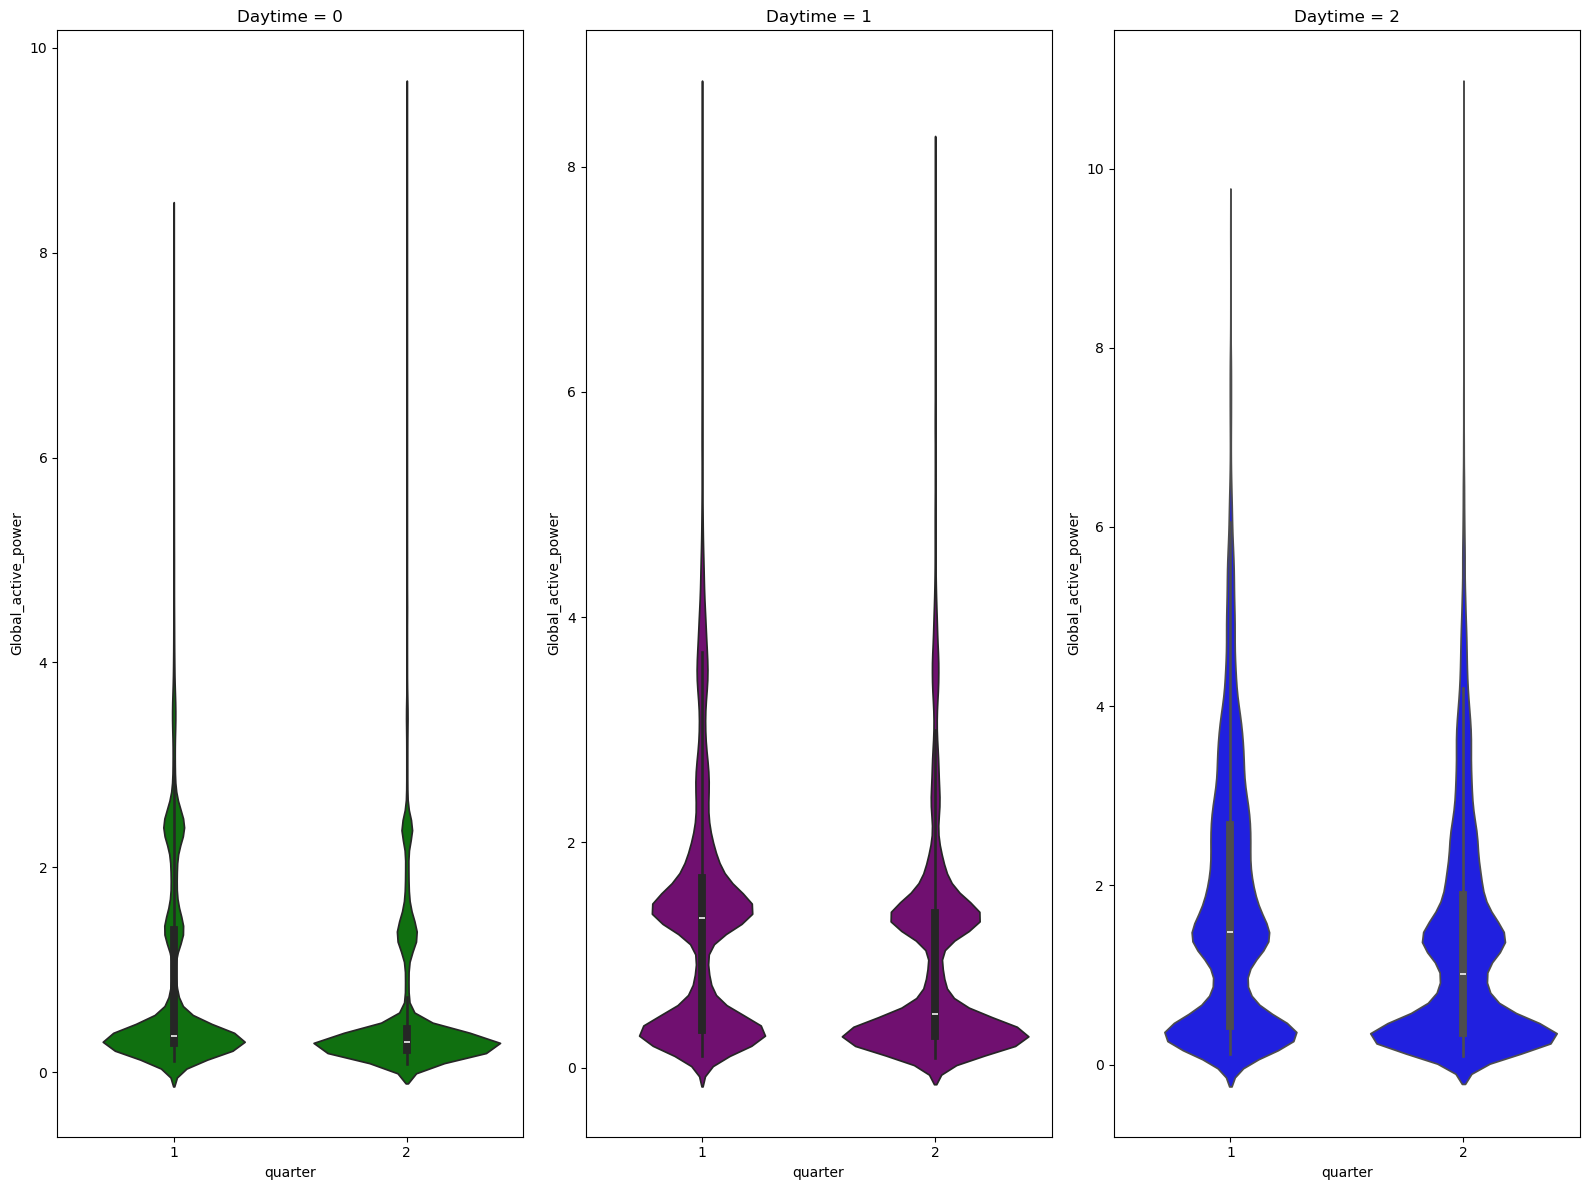

In [20]:
import seaborn as sns
# Figure ve axes oluşturma
fig, axes = plt.subplots(1, 3, figsize=(16,12))

# Daytime = 0 için violin plot
sns.violinplot(data=data[data["Daytime"] == 0], x = "quarter", y="Global_active_power", ax=axes[0], color="green")
axes[0].set_title("Daytime = 0")

# Daytime = 1 için violin plot
sns.violinplot(data=data[data["Daytime"] == 1],x = "quarter", y="Global_active_power", ax=axes[1], color="purple")
axes[1].set_title("Daytime = 1")

# Daytime = 2 için violin plot
sns.violinplot(data=data[data["Daytime"] == 2], x = "quarter", y="Global_active_power", ax=axes[2], color="blue")
axes[2].set_title("Daytime = 2")

plt.tight_layout()
plt.show()


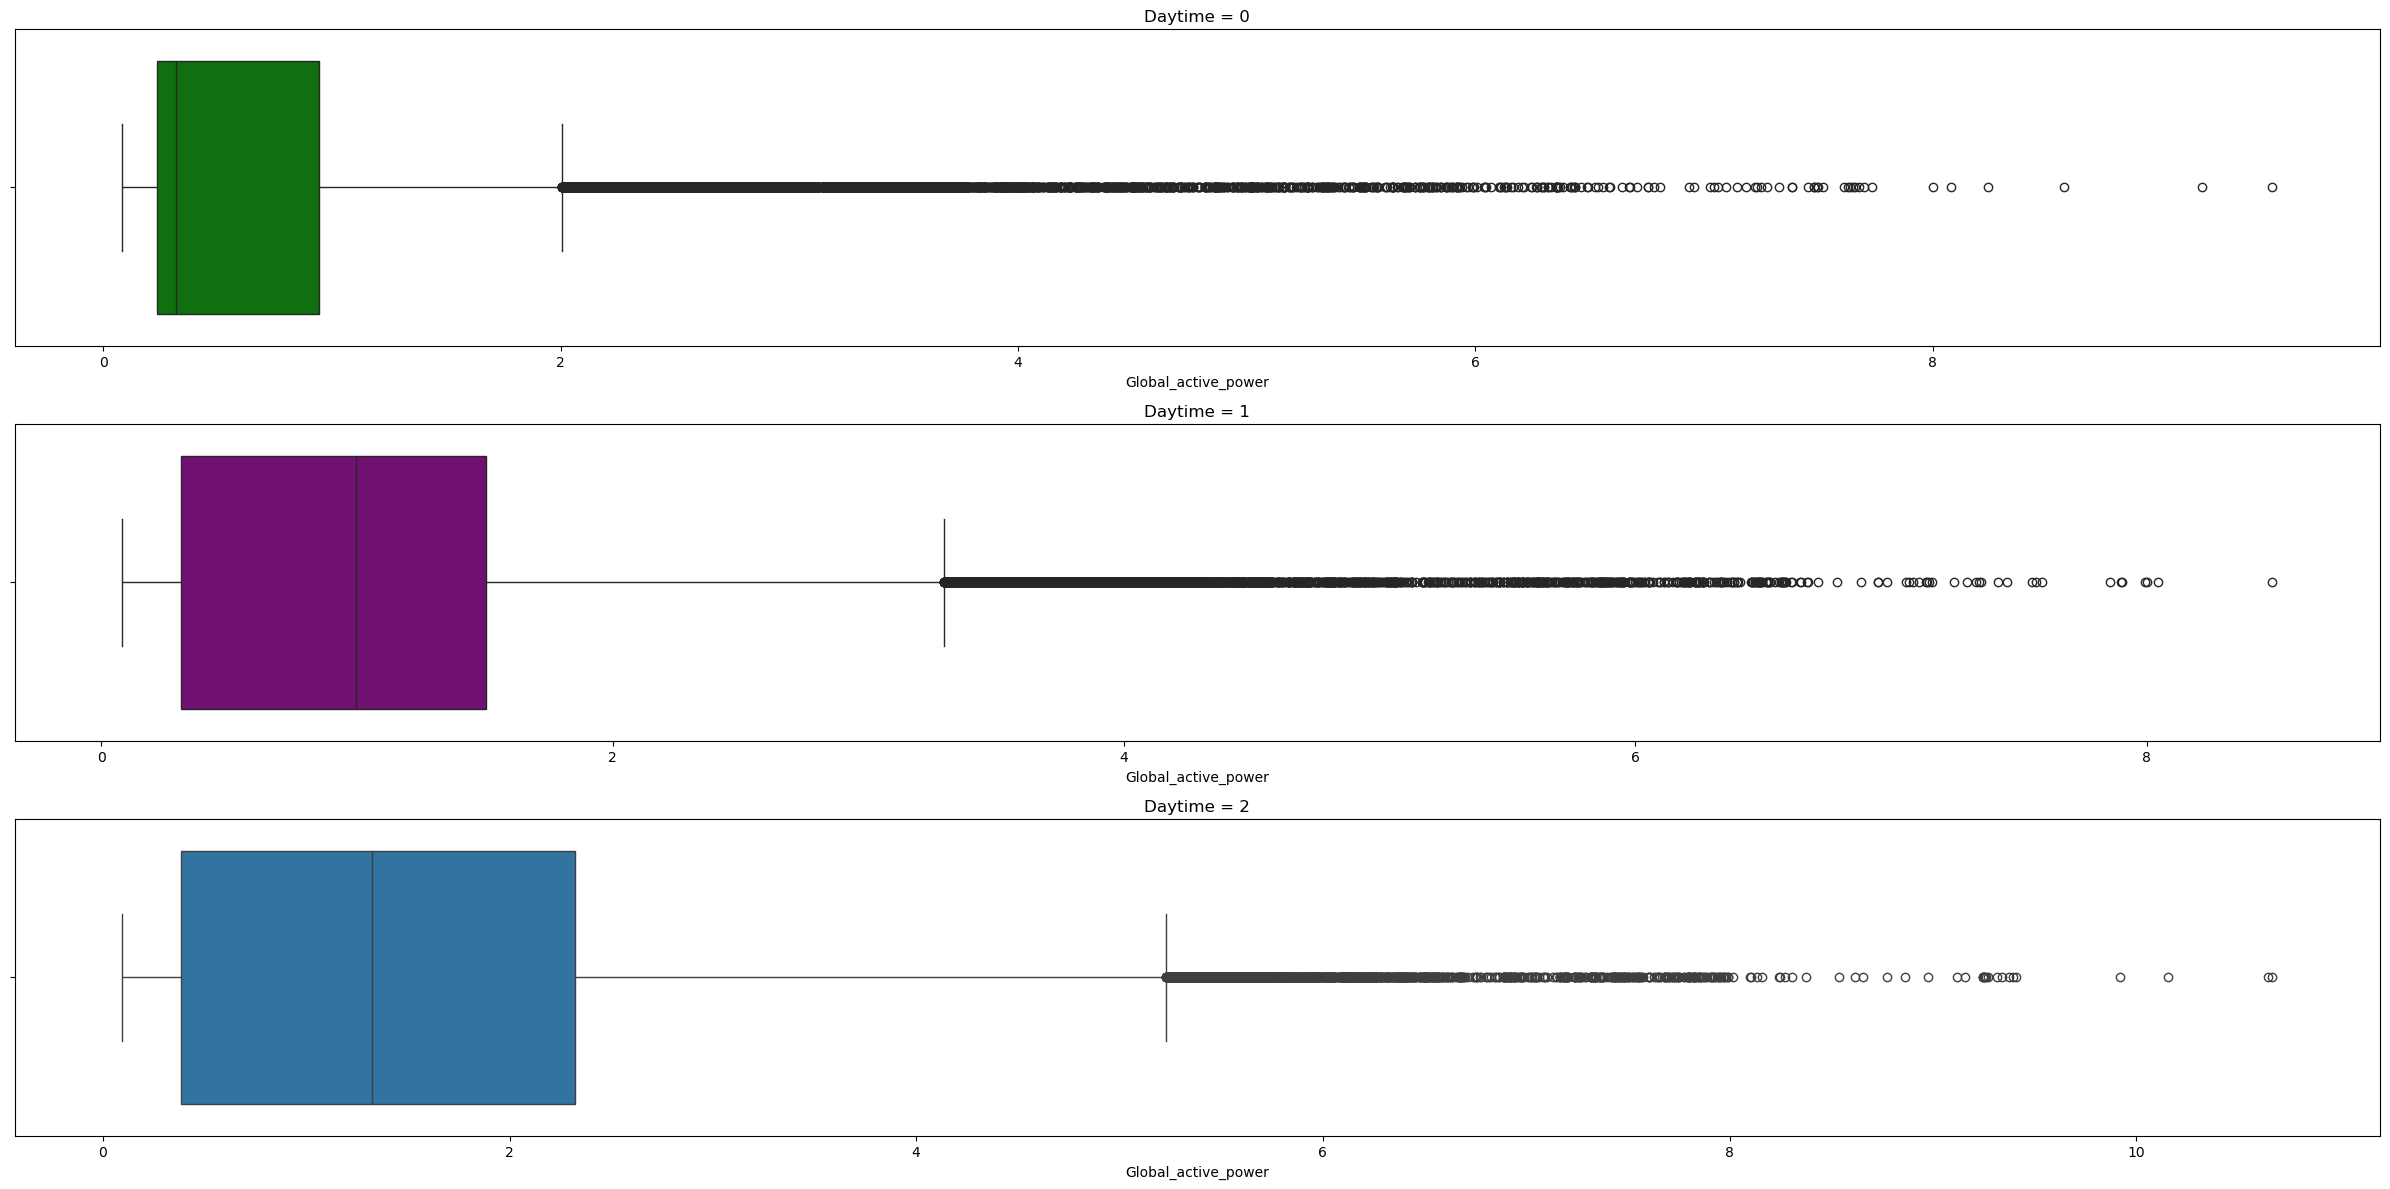

In [21]:
fig, axes = plt.subplots(3, figsize=(24, 12))

# Plot for Daytime = 0
sns.boxplot(data=data[data["Daytime"] == 0], x="Global_active_power", ax=axes[0], color="green")
axes[0].set_title("Daytime = 0")

# Plot for Daytime = 1
sns.boxplot(data=data[data["Daytime"] == 1], x="Global_active_power", ax=axes[1], color="purple")
axes[1].set_title("Daytime = 1")

# Plot for Daytime = 2
sns.boxplot(data=data[data["Daytime"] == 2], x="Global_active_power", ax=axes[2])
axes[2].set_title("Daytime = 2")

plt.tight_layout()
plt.show()


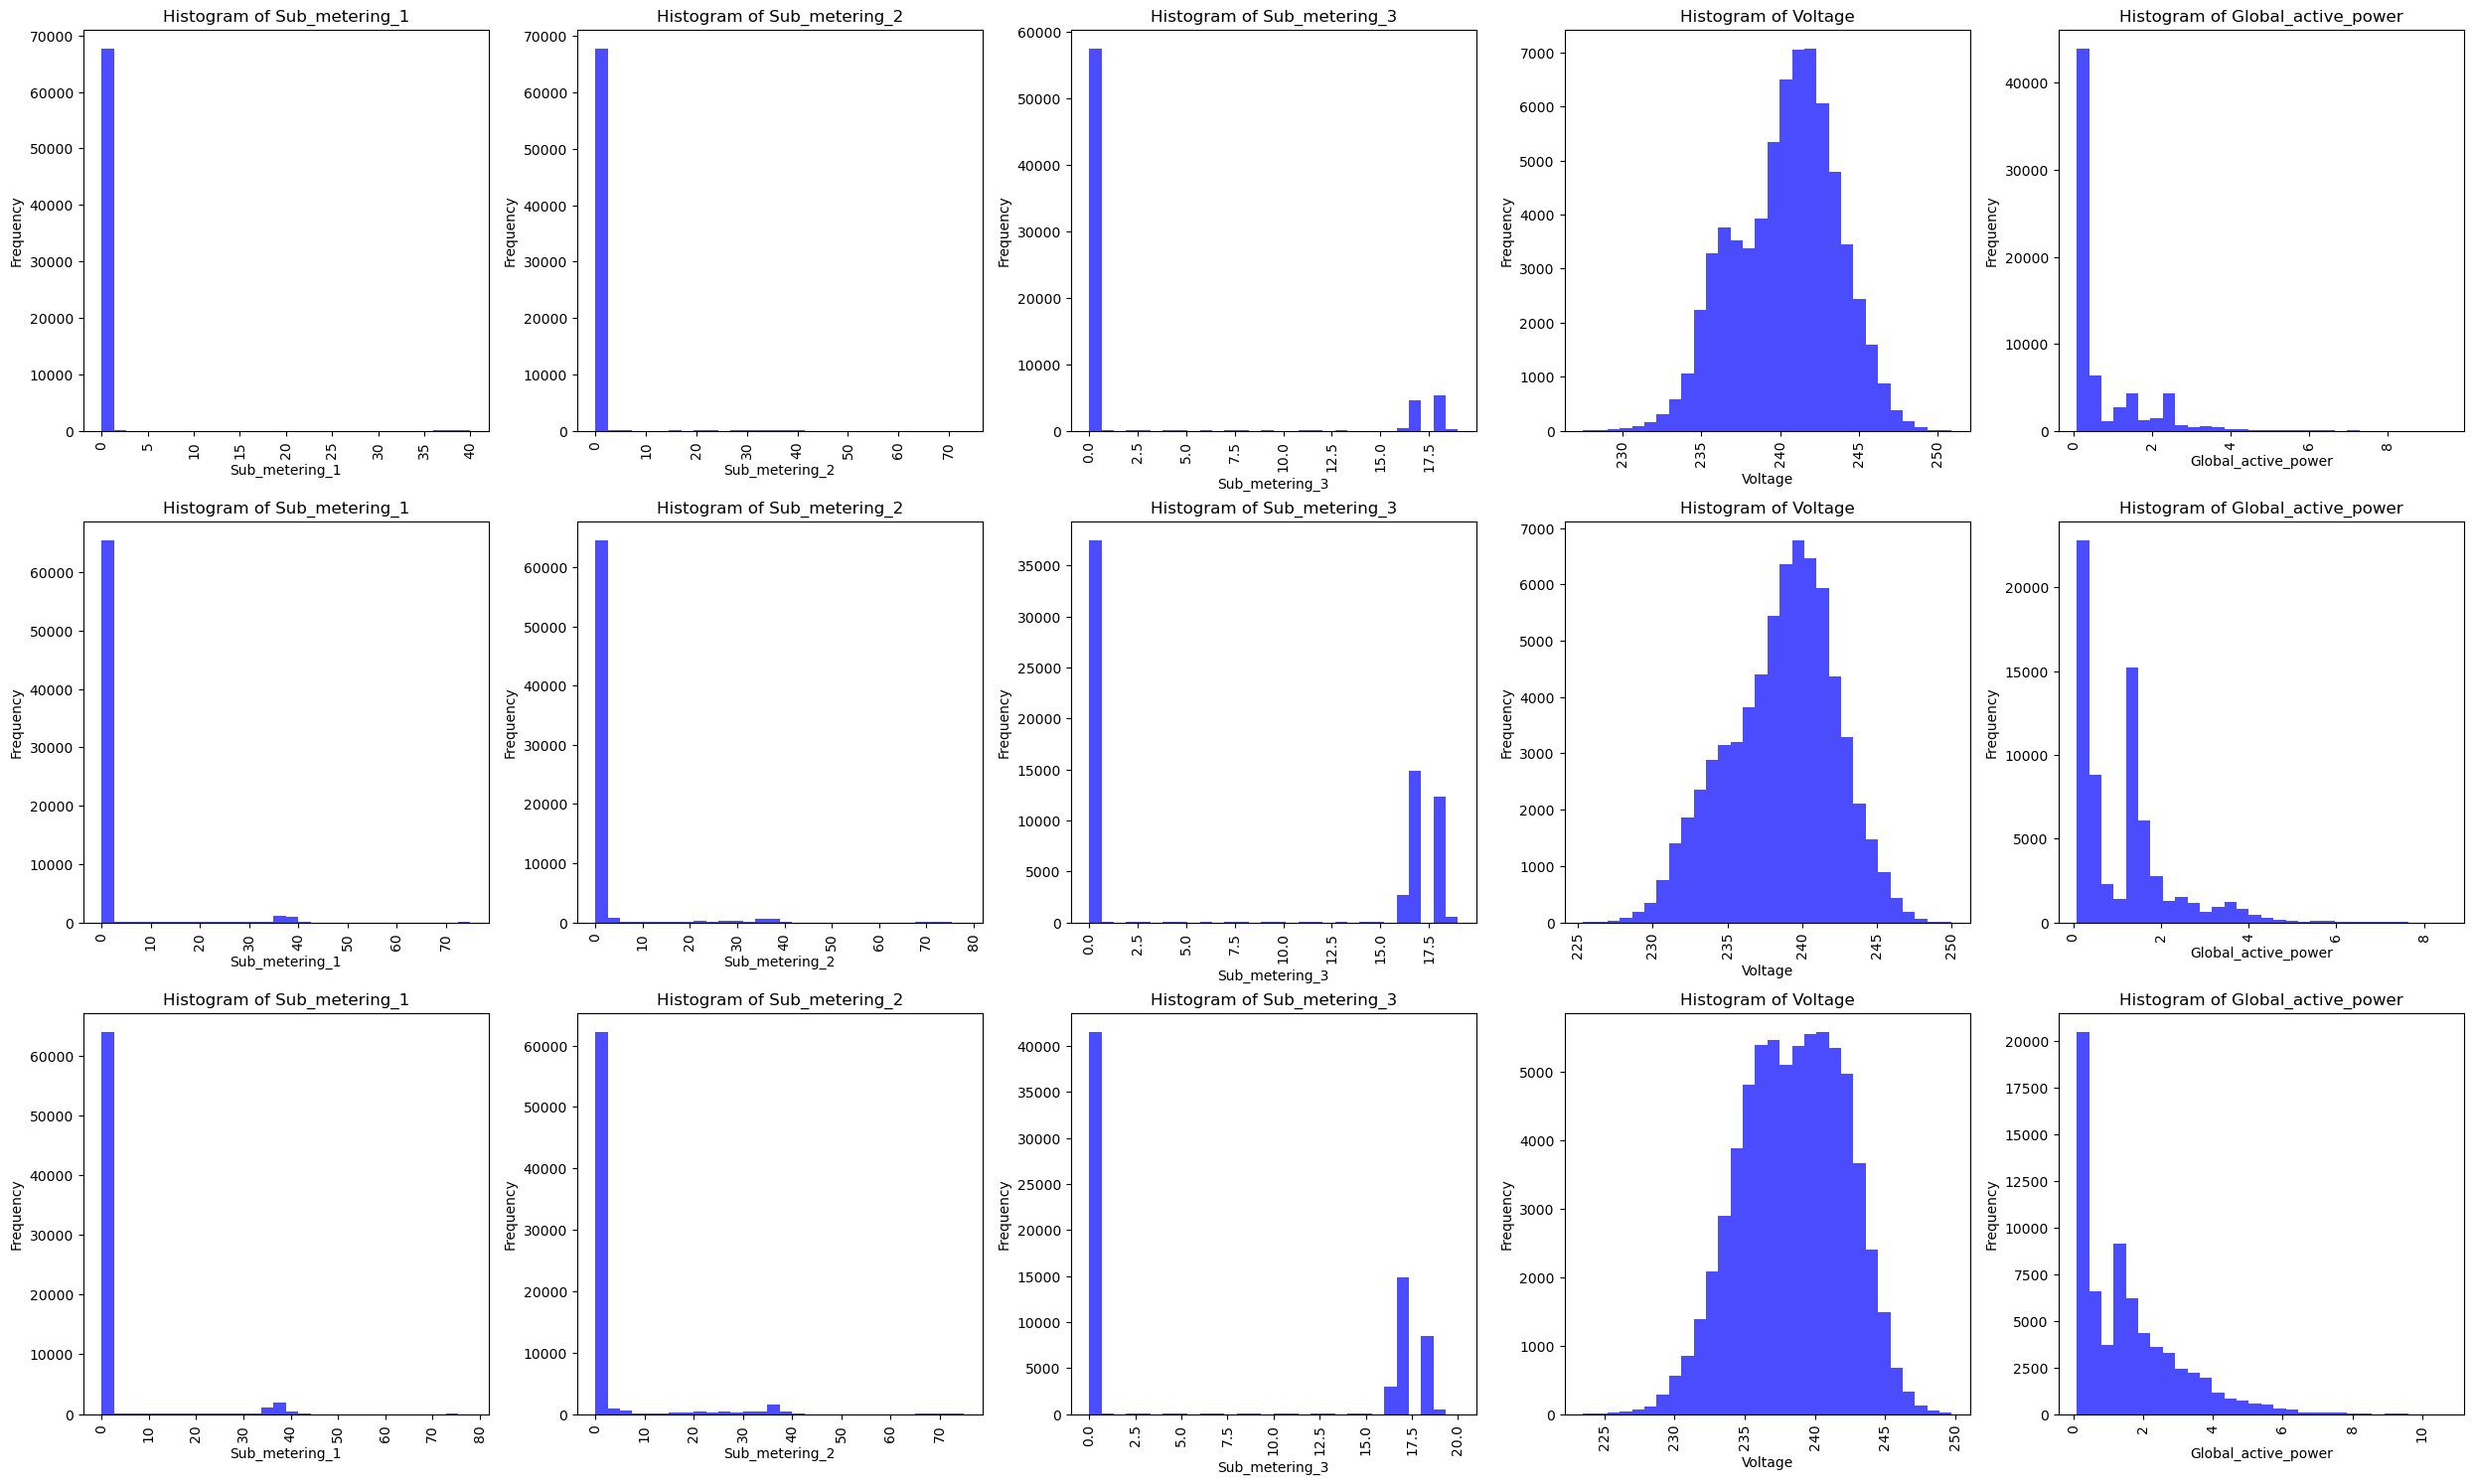

In [22]:
time_data = data
features = [0, 1, 2]
columns = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Voltage", "Global_active_power"]

def create_good_histograms(dataset, changing_features, columns_to_vis):
    _column_len = len(columns_to_vis)
    _row_len = len(changing_features)
    _fig_const = 5
    _fig_size = (_column_len* _fig_const, _row_len* _fig_const)
    
    fig, axes = plt.subplots(_row_len, _column_len, figsize = _fig_size)
    
    for feature in changing_features:
        temp_dataset = dataset[dataset["Daytime"] == feature]
        for plot_index, column in enumerate(columns):
            axes[feature, plot_index].hist(temp_dataset[column].dropna(), bins=30, color='blue', alpha=0.7) 
            axes[feature, plot_index].set_title(f"Histogram of {column}")
            axes[feature, plot_index].set_xlabel(column)
            axes[feature, plot_index].set_ylabel("Frequency")
            
            # Rotate x-axis labels
            axes[feature, plot_index].tick_params(axis='x', rotation=90) 
    
    plt.tight_layout()
    plt.show() 

create_good_histograms(time_data, features, columns)

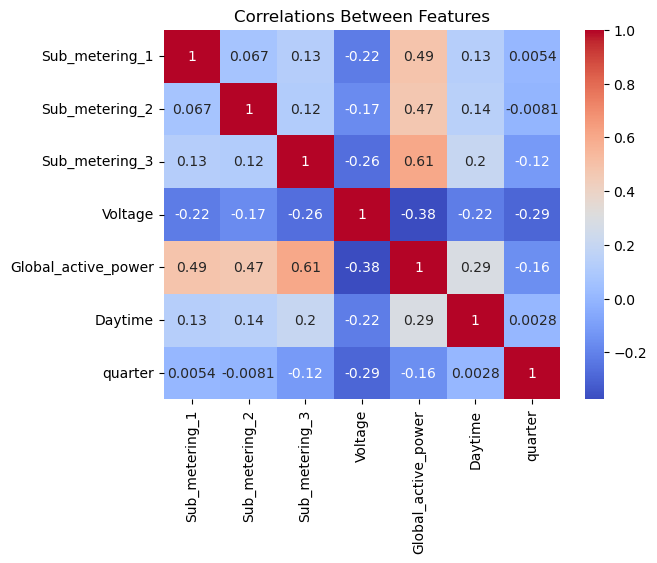

In [23]:
correlation_data = data.loc[:,["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Voltage", "Global_active_power", "Daytime", "quarter"]]
correlation_matrix = correlation_data.corr()


sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm")
plt.title("Correlations Between Features")
plt.show()

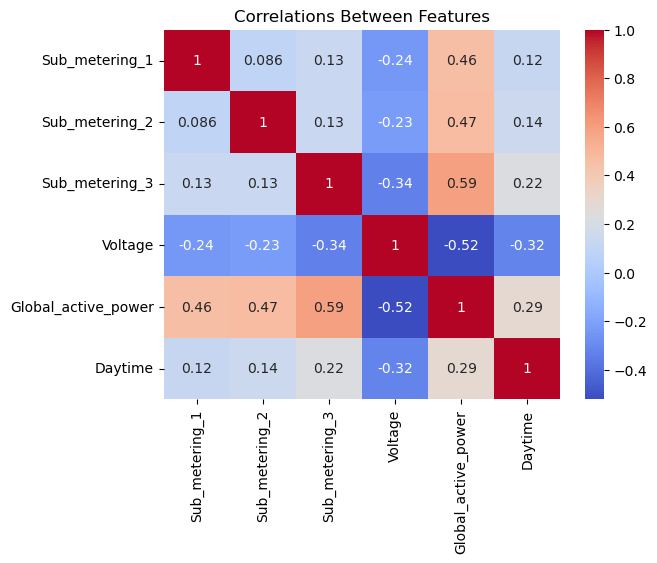

In [24]:
_first_data_to_corr = data[data["quarter"] == 1]
correlation_data = _first_data_to_corr.loc[:,["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Voltage", "Global_active_power", "Daytime"]]
correlation_matrix = correlation_data.corr()


sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm")
plt.title("Correlations Between Features")
plt.show()

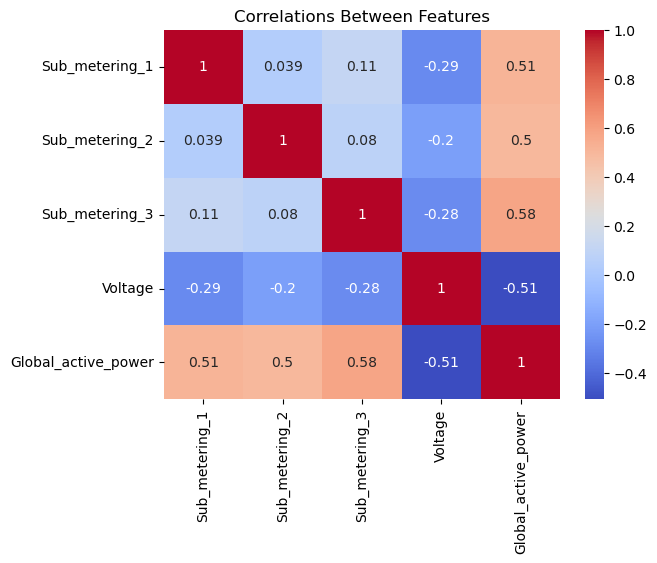

In [25]:
#_second_data_to_corr = data[data["quarter"] == 1]
_second_data_to_corr = data[data["Daytime"] == 2]
correlation_data = _second_data_to_corr.loc[:,["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Voltage", "Global_active_power"]]
correlation_matrix = correlation_data.corr()


sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm")
plt.title("Correlations Between Features")
plt.show()

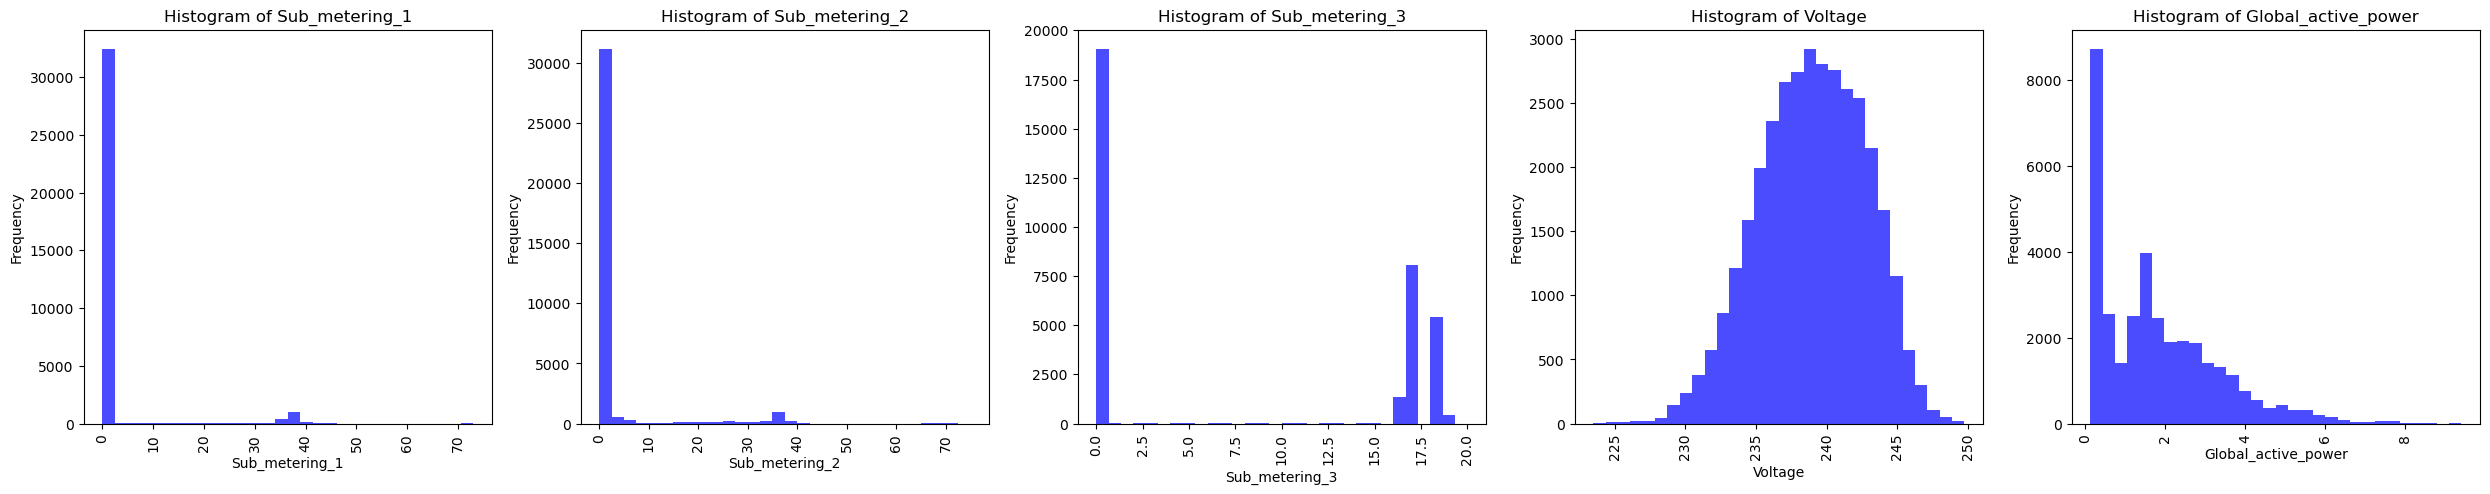

In [26]:
prime_time_data = data[data["Daytime"] == 2]
prime_time_data = prime_time_data[prime_time_data["quarter"] == 1]
columns = ["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Voltage", "Global_active_power"]

fig, axes = plt.subplots(1, len(columns), figsize=(25, 5))

for plot_index, column in enumerate(columns):
    axes[plot_index].hist(prime_time_data[column].dropna(), bins=30, color='blue', alpha=0.7) 
    axes[plot_index].set_title(f"Histogram of {column}")
    axes[plot_index].set_xlabel(column)
    axes[plot_index].set_ylabel("Frequency")
    
    # Rotate x-axis labels
    axes[plot_index].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()


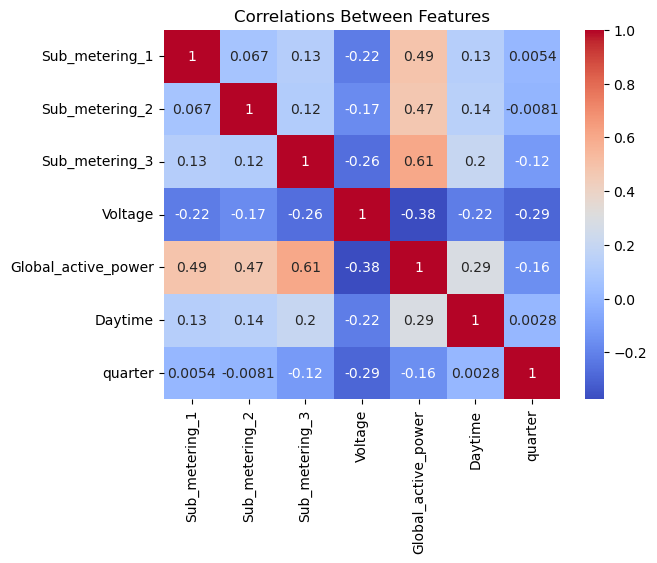

In [27]:
correlation_data = data.loc[:,["Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Voltage", "Global_active_power", "Daytime", "quarter"]]
correlation_matrix = correlation_data.corr()


sns.heatmap(correlation_matrix, annot= True, cmap= "coolwarm")
plt.title("Correlations Between Features")
plt.show()

In [28]:
import yfinance as yf
import pandas_ta as ta

#transform data to numeric 
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
# print(df['Global_reactive_power'].dtype)
# print(df['Global_reactive_power'].head())

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')
# transform time
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df['Time'] = pd.to_datetime(df['Time'],format='mixed')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256869 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   256869 non-null  datetime64[ns]
 1   Time                   256869 non-null  datetime64[ns]
 2   Global_active_power    256869 non-null  float64       
 3   Global_reactive_power  256869 non-null  float64       
 4   Voltage                256869 non-null  float64       
 5   Global_intensity       256869 non-null  float64       
 6   Sub_metering_1         256869 non-null  int64         
 7   Sub_metering_2         256869 non-null  int64         
 8   Sub_metering_3         256869 non-null  float64       
 9   date_time              256869 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2)
memory usage: 21.6 MB


In [44]:
#adugarea indicatorilor
df['RSI'] = ta.rsi(close = df['Global_reactive_power'], length=15) 
df['EMAF'] = ta.ema(close = df['Global_reactive_power'], length=20) 
df['EMAM'] = ta.ema(close = df['Global_reactive_power'], length=100) 
df['EMAS'] = ta.ema(close = df['Global_reactive_power'], length=200)

In [46]:
df['TargetNextDay'] = df['Global_reactive_power'].shift(-1)

In [48]:
data_set =df.iloc[:,0:15]
pd.set_option('display.max_columns', None)
df.isna().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3             0
date_time                  0
RSI                       15
EMAF                      19
EMAM                      99
EMAS                     199
TargetNextDay              1
dtype: int64

In [50]:
data_set.dropna(inplace = True)
data_set.reset_index(inplace = True)

In [52]:
data_set['Date'] = data_set['Date'].astype('int64') // 10**9
data_set['Time'] = data_set['Time'].astype('int64') // 10**9

In [54]:
data_set.drop(['index'], axis= 1, inplace= True)
data_set.drop(['date_time'], axis= 1, inplace= True)

In [56]:
print(data_set.head())  # Check sample data
print(data_set.dtypes) 

         Date        Time  Global_active_power  Global_reactive_power  \
0  1167609600  1735096740                2.764                  0.000   
1  1167609600  1735096800                2.700                  0.000   
2  1167609600  1735096860                2.800                  0.114   
3  1167609600  1735096920                2.540                  0.118   
4  1167609600  1735096980                2.548                  0.120   

   Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0   242.39              11.4               0               0             0.0   
1   243.00              11.0               0               0             0.0   
2   243.66              11.4               0               0             0.0   
3   244.16              10.4               0               0             0.0   
4   244.56              10.4               0               0             0.0   

         RSI      EMAF      EMAM      EMAS  TargetNextDay  
0  23.786659  0.0860

In [58]:
data_set

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,RSI,EMAF,EMAM,EMAS,TargetNextDay
0,1167609600,1735096740,2.764,0.000,242.39,11.4,0,0,0.0,23.786659,0.086084,0.112710,0.099810,0.000
1,1167609600,1735096800,2.700,0.000,243.00,11.0,0,0,0.0,23.786659,0.077886,0.110478,0.098817,0.114
2,1167609600,1735096860,2.800,0.114,243.66,11.4,0,0,0.0,52.548532,0.081325,0.110548,0.098968,0.118
3,1167609600,1735096920,2.540,0.118,244.16,10.4,0,0,0.0,53.212330,0.084818,0.110696,0.099157,0.120
4,1167609600,1735096980,2.548,0.120,244.56,10.4,0,0,0.0,53.560353,0.088169,0.110880,0.099365,0.122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256664,1183161600,1735170840,2.880,0.358,238.70,12.0,0,0,17.0,75.934706,0.309111,0.172703,0.161782,0.360
256665,1183161600,1735170900,2.880,0.360,239.01,12.0,0,0,18.0,76.228587,0.313958,0.176412,0.163754,0.358
256666,1183161600,1735170960,2.892,0.358,238.86,12.2,0,0,17.0,75.244089,0.318152,0.180008,0.165687,0.280
256667,1183161600,1735171020,2.882,0.280,239.05,12.0,0,0,18.0,48.870408,0.314519,0.181988,0.166824,0.290


In [60]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.         0.13829048 0.25330563 ... 0.16508895 0.14406111 0.        ]
 [0.         0.13898541 0.24726105 ... 0.16039528 0.14146535 0.09930314]
 [0.         0.13968033 0.2567057  ... 0.16054193 0.14186022 0.10278746]
 ...
 [0.53097345 0.99791522 0.26539479 ... 0.30661572 0.31624394 0.24390244]
 [0.53097345 0.99861015 0.26445032 ... 0.31077976 0.31921688 0.25261324]
 [0.53097345 0.99930507 0.24348319 ... 0.31527778 0.32242031 0.30836237]]


In [62]:
X = []
backcandles = 30
print (data_set_scaled.shape[0])
for j in range(14):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])
X= np.moveaxis(X, [0], [1])
X,yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y= np.reshape(yi,(len(yi),1))
print(X.shape)
print(y.shape)

256669
(256639, 14, 30)
(256639, 1)


In [64]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
# import numpy as np

In [65]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

205311
(205311, 14, 30)
(51328, 14, 30)
(205311, 1)
(51328, 1)
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.06968641]
 [0.07142857]
 [0.07142857]]


In [69]:
np.random.seed(10)

lstm_input = Input(shape=(14, backcandles), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 66s 5ms/step - loss: 0.0016 - val_loss: 8.9143e-04
Epoch 2/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - loss: 0.0010 - val_loss: 9.0586e-04
Epoch 3/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 66s 5ms/step - loss: 0.0010 - val_loss: 8.7394e-04
Epoch 4/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - loss: 0.0010 - val_loss: 8.6796e-04
Epoch 5/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step - loss: 0.0010 - val_loss: 8.5586e-04
Epoch 6/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 66s 5ms/step - loss: 9.8527e-04 - val_loss: 8.8421e-04
Epoch 7/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - loss: 0.0010 - val_loss: 9.2648e-04
Epoch 8/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - loss: 9.7081e-04 - val_loss: 8.7353e-04
Epoch 9/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - loss: 9.8330e-04 - val_loss: 8.9136e-04
Epoch 10/30
12319/12319 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - loss: 9.7691e-04 - val_loss: 8.5611e-04
Epoch 11/30
12319/12319 ━━━━━━━━━

In [71]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(20):
    print(y_pred[i], y_test[i])

1604/1604 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
[0.07388419] [0.06620209]
[0.05887956] [0.06794425]
[0.06367167] [0.06794425]
[0.06513795] [0.06620209]
[0.06532018] [0.06794425]
[0.0682137] [0.06620209]
[0.06595472] [0.06794425]
[0.07012099] [0.06445993]
[0.06249215] [0.06445993]
[0.06396516] [0.06620209]
[0.06047884] [0.05749129]
[0.05207913] [0.]
[0.01488247] [0.04529617]
[0.05590434] [0.06794425]
[0.07389] [0.05400697]
[0.06020786] [0.]
[0.01896671] [0.]
[0.00920008] [0.]
[0.01793817] [0.]
[0.01693138] [0.]


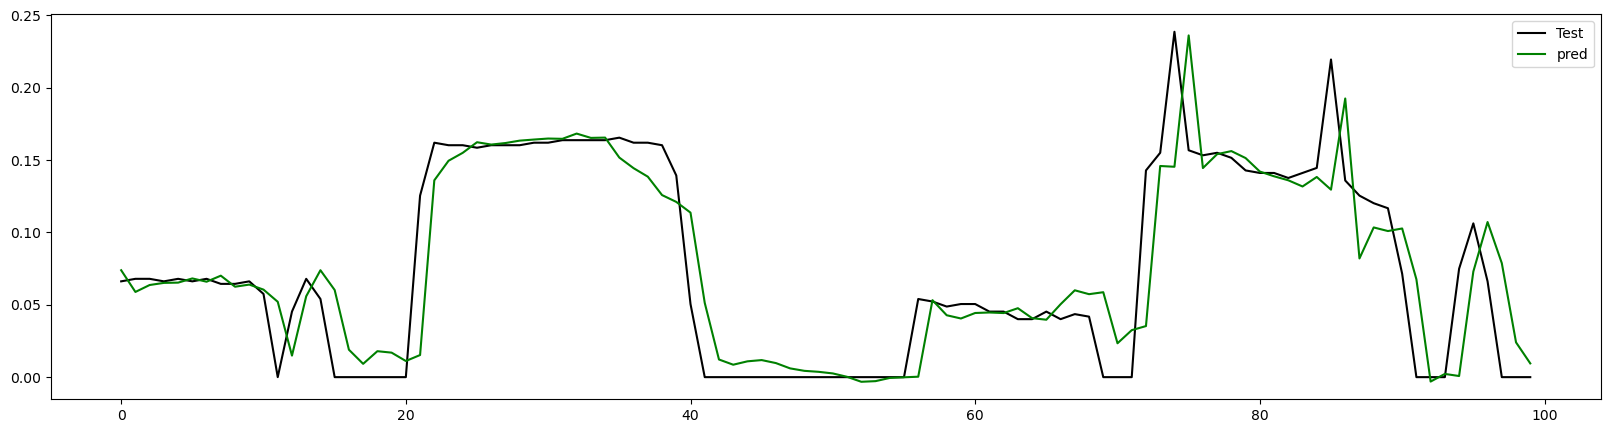

In [73]:
plt.figure(figsize=(20,5))
plt.plot(y_test[:100], color = 'black', label = 'Test')
plt.plot(y_pred[:100], color = 'green', label = 'pred')
plt.legend()
plt.show()

In [75]:
from joblib import dump
dump(model, "lstm_model.joblib")

['lstm_model.joblib']

In [79]:
from joblib import load
model_t = load ("lstm_model.joblib")
y_pred = model_t.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(20):
    print(y_pred[i], y_test[i])
    

1604/1604 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
[0.07388419] [0.06620209]
[0.05887956] [0.06794425]
[0.06367167] [0.06794425]
[0.06513795] [0.06620209]
[0.06532018] [0.06794425]
[0.0682137] [0.06620209]
[0.06595472] [0.06794425]
[0.07012099] [0.06445993]
[0.06249215] [0.06445993]
[0.06396516] [0.06620209]
[0.06047884] [0.05749129]
[0.05207913] [0.]
[0.01488247] [0.04529617]
[0.05590434] [0.06794425]
[0.07389] [0.05400697]
[0.06020786] [0.]
[0.01896671] [0.]
[0.00920008] [0.]
[0.01793817] [0.]
[0.01693138] [0.]
